In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sb
sb.set_theme(style="whitegrid")


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

%matplotlib inline
pd.set_option("display.max_rows", 7) 

## 1. Data Preprocessing

#### Data Cleaning

In [ ]:
# Load the raw data
data = pd.read_csv('/content/drive/MyDrive/Data240/project/drug_consumption.data', header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [ ]:
# Add column names
column_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 
                'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness',
                'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 
                'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 
                'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

data.columns = column_names
data

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [ ]:
# Check for missing values 
print(data.isna().sum())

ID          0
Age         0
Gender      0
           ..
Nicotine    0
Semeron     0
VSA         0
Length: 32, dtype: int64


In [ ]:
# number of unique values in each column
data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'ID': 1885,
 'Age': 6,
 'Gender': 2,
 'Education': 9,
 'Country': 7,
 'Ethnicity': 7,
 'Neuroticism': 49,
 'Extraversion': 42,
 'Openness': 35,
 'Agreeableness': 41,
 'Conscientiousness': 41,
 'Impulsiveness': 10,
 'Sensation_seeking': 11,
 'Alcohol': 7,
 'Amphetamine': 7,
 'Amyl_nitrite': 7,
 'Benzodiazepine': 7,
 'Caffeine': 7,
 'Cannabis': 7,
 'Chocolate': 7,
 'Cocaine': 7,
 'Crack': 7,
 'Ecstasy': 7,
 'Heroin': 7,
 'Ketamine': 7,
 'Legal_highs': 7,
 'LSD': 7,
 'Methadone': 7,
 'Mushrooms': 7,
 'Nicotine': 7,
 'Semeron': 5,
 'VSA': 7}

In [ ]:
# Set ID as index
data.set_index('ID', inplace = True)
data

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [ ]:
# data statistics
data.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
...,...,...,...,...,...,...,...,...,...,...,...,...
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


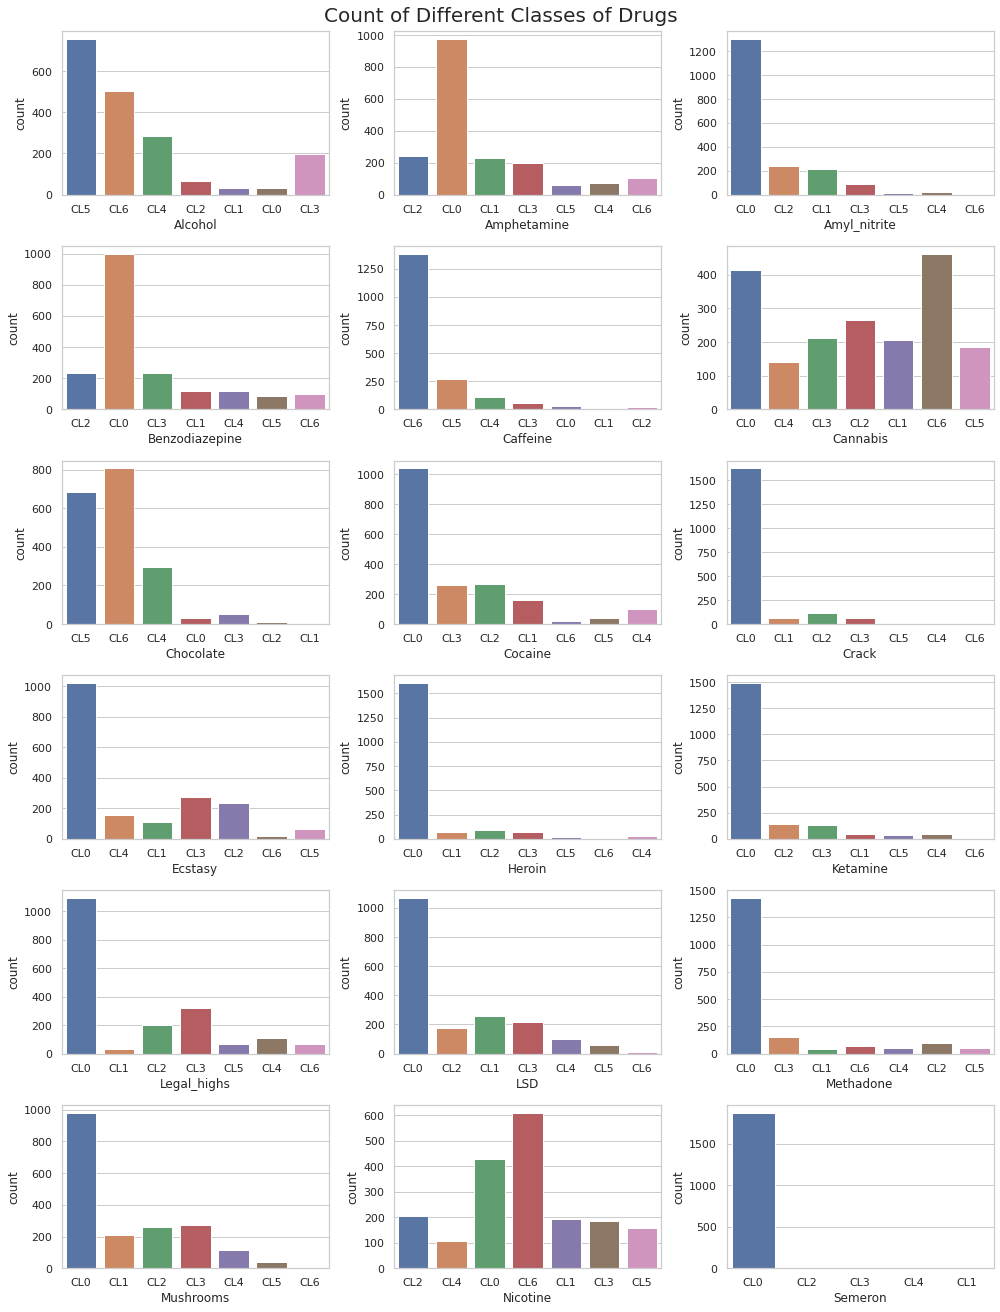

In [ ]:
drugs = ['Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 
         'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin',
         'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA'] 

fig, axes = plt.subplots(6,3,figsize = (14,18))
fig.suptitle("Count of Different Classes of Drugs",fontsize=20,position=(.5,1.01))
k=0
for i in range(6):
    for j in range(3):
        sb.countplot(x=drugs[k], data=data,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

### Feature Encoding

#### Discriminate participants into groups of users and non-users for binary classification

In [ ]:
# we select year-based method  to build a prediction model more on the weekly, monthly, and yearly relevance of information, 
# we are more likely to identify really people who use drugs, rather than those who just tried them a decade year ago.

# 1 - if a person used a drug in year, month, week or day
# 0 - a person did not consume a drug

def category(x):
    
    if ((x == 'CL3') or (x == 'CL4') or (x == 'CL5') or (x == 'CL6') ):
        x = 1    
    else :
        x = 0
    
    return x

In [ ]:
drugs = ['Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 
         'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin',
         'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA'] 
          
for i in drugs:
  data[i] = data[i].map(category)

In [ ]:
data

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,1,0,1,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,0,0,0,0,0,1,0,0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,1,0,0,1,1,0,1,1,0,0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,...,1,0,0,1,1,0,1,1,0,0


####  Encode categorical features: ethnicity, education, country, gender and age

In [ ]:
categorical_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

In [ ]:
def unify_decimal_floating_point(x):
    x = float('{:.5f}'.format(x))
    return x

for i in list(categorical_features ):
    data[i] = data[i].map(unify_decimal_floating_point)

In [ ]:
#Eecode Age: 
#'18-24'  -> 0
#'25-34'  -> 1
#'35-44'  -> 2
#'45-54'  -> 3
#'55-64'  -> 4
#'65+'    -> 5

def encode_age(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x

data['Age'] = data['Age'].map(encode_age)

In [ ]:
#Encode Gender:
# Female -> 0
# Male   -> 1

def encode_gender(x):
    if (x == 0.48246 ):
        x = 0
    else:
        x = 1
    return x

data['Gender'] = data['Gender'].map(encode_gender)

In [ ]:
#Encode Education:
# Left school before 16 years                          -> 0
# Left school at 16 years                              -> 1
# Left school at 17 years                              -> 2
# Left school at 18 years                              -> 3
# Some college or university, no certificate or degree -> 4
# Professional certificate/ diploma                    -> 5
# University degree                                    -> 6
# Masters degree                                       -> 7
# Doctorate degree                                     -> 8

def encode_education(x):
  
  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  else:
    x = 8
  return x

data['Education'] = data['Education'].map(encode_education)

In [ ]:
#encode country:
#Australia          -> 0
#Canada             -> 1
#New Zealand        -> 2
#Other              -> 3
#Republic of Ireland-> 4
#UK                 -> 5
#USA                -> 6

def encode_country(x):
  
  if (x == -0.09765):
    x = 0
  elif (x == 0.24923):
    x = 1
  elif (x == -0.46841):
    x = 2
  elif (x == -0.28519):
    x = 3
  elif (x == 0.21128):
    x = 4
  elif (x == 0.96082):
    x = 5
  else:
    x = 6
  return x

data['Country'] = data['Country'].map(encode_country)

In [ ]:
#encode Ethnicity
#Asian  -> 0
#Black  -> 1
#Mixed-Black/Asian -> 2
#Mixed-White/Asian -> 3
#Mixed-White/Black -> 4
#Other             -> 5
#White             -> 6

def encode_ethnicity(x):
  
  if (x == -0.50212):
    x = 0
  elif (x == -1.10702):
    x = 1
  elif (x == 1.90725):
    x = 2
  elif (x == 0.12600):
    x = 3
  elif (x == -0.22166):
    x = 4
  elif (x == 0.11440):
    x = 5
  elif (x == -0.31685):
    x = 6
  return x

data['Ethnicity'] = data['Ethnicity'].map(encode_ethnicity)

In [ ]:
data

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,2,0,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
2,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,1,0,1,0,0
3,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,0,0,0,0,0,1,0,0
1887,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,1,0,0,1,1,0,1,1,0,0
1888,0,1,4,4,6,-0.46725,2.12700,1.65653,1.11406,0.41594,...,1,0,0,1,1,0,1,1,0,0


In [ ]:
data_nunique_dict_1 = data.nunique().to_dict()
data_nunique_dict_1

{'Age': 6,
 'Gender': 2,
 'Education': 9,
 'Country': 7,
 'Ethnicity': 7,
 'Neuroticism': 49,
 'Extraversion': 42,
 'Openness': 35,
 'Agreeableness': 41,
 'Conscientiousness': 41,
 'Impulsiveness': 10,
 'Sensation_seeking': 11,
 'Alcohol': 2,
 'Amphetamine': 2,
 'Amyl_nitrite': 2,
 'Benzodiazepine': 2,
 'Caffeine': 2,
 'Cannabis': 2,
 'Chocolate': 2,
 'Cocaine': 2,
 'Crack': 2,
 'Ecstasy': 2,
 'Heroin': 2,
 'Ketamine': 2,
 'Legal_highs': 2,
 'LSD': 2,
 'Methadone': 2,
 'Mushrooms': 2,
 'Nicotine': 2,
 'Semeron': 2,
 'VSA': 2}

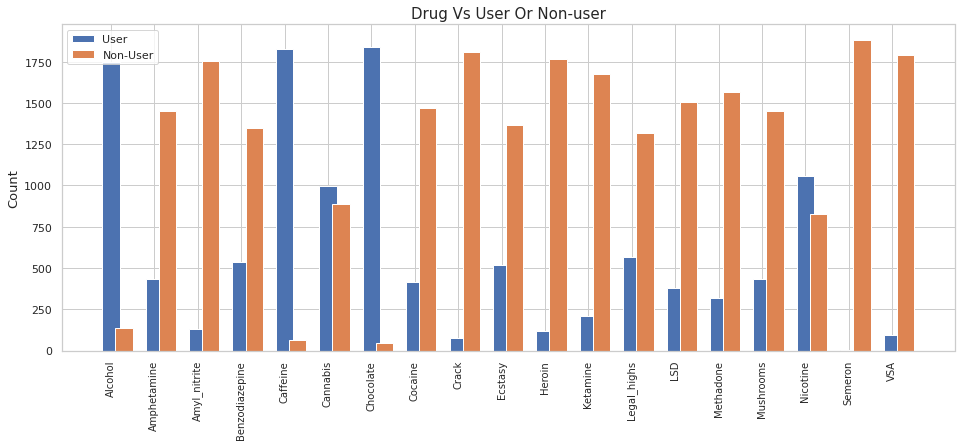

In [ ]:
count_of_users = []
count_of_non_users = []

for i in range(len(drugs)):
    s = data.groupby([drugs[i]])[drugs[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])


bins = np.arange(1,20,1)
plt.figure(figsize=(16,6))
plt.bar(bins+0,count_of_users,width=0.4,label ='User')
plt.bar(bins+.30,count_of_non_users,width=0.4,label ='Non-User')
plt.xticks(bins,drugs,rotation=90,fontsize=10)
plt.ylabel("Count",fontsize=13)
plt.title("Drug Vs User Or Non-user",fontsize=15)
plt.legend()

As shown in the above bar charts, the data on  Cannabis is the most balanced. So, we Select 'Cannabis' as the target feature.

### Split the data into training and testing datasets using stratification

In [ ]:
# Split data into training and testing datasets using stratification.
# Because the dataset on the target is a little bit imbalanced.

def preprocess_inputs(df, column):
    data_1 = df.copy()
    
    # Split df into X and y
    y_1 = data_1[column]
    X_1 = data_1.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state = 42, stratify=y_1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test, y_1, X_1

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1, y_1, X_1= preprocess_inputs(data, 'Cannabis')

In [ ]:
X_train_1

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1728,-1.054862,-1.005319,-2.295325,0.102366,0.255991,-1.716719,0.345976,-1.834028,1.804105,0.756350,...,-0.616189,-0.257833,-0.351704,-0.656308,-0.499378,-0.456435,-0.549768,0.871566,-0.02576,-0.23355
1657,-1.054862,-1.005319,0.562933,0.102366,0.255991,1.724244,-1.214979,-0.721729,-0.624470,0.119312,...,-0.616189,-0.257833,-0.351704,-0.656308,-0.499378,-0.456435,-0.549768,-1.147361,-0.02576,-0.23355
1121,-1.054862,0.994709,-0.580370,0.837455,0.255991,1.019330,-0.419522,-0.023502,-1.791864,-1.022168,...,1.622879,-0.257833,-0.351704,1.523675,2.002490,-0.456435,1.818948,0.871566,-0.02576,-0.23355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,-0.269315,0.994709,-0.008719,0.102366,0.255991,0.409633,-0.787383,-0.851824,-1.231166,1.305937,...,-0.616189,-0.257833,-0.351704,-0.656308,-0.499378,-0.456435,-0.549768,0.871566,-0.02576,-0.23355
247,-0.269315,-1.005319,-0.008719,0.102366,0.255991,1.374122,-0.675807,-1.280179,0.421924,-0.659031,...,-0.616189,-0.257833,-0.351704,-0.656308,-0.499378,-0.456435,-0.549768,0.871566,-0.02576,-0.23355
412,1.301778,0.994709,-1.152022,0.102366,0.255991,1.019330,-1.360271,0.441786,0.925708,-1.393883,...,-0.616189,-0.257833,-0.351704,-0.656308,-0.499378,2.190890,-0.549768,-1.147361,-0.02576,-0.23355


In [ ]:
y_train_1

ID
1728    0
1657    0
1121    1
       ..
1733    0
247     0
412     1
Name: Cannabis, Length: 1508, dtype: int64

In [ ]:
X_train_1.to_csv('/content/drive/MyDrive/Data240/project/X_train_1.csv')
y_train_1.to_csv('/content/drive/MyDrive/Data240/project/y_train_1.csv')
X_test_1.to_csv('/content/drive/MyDrive/Data240/project/X_test_1.csv')
y_test_1.to_csv('/content/drive/MyDrive/Data240/project/y_test_1.csv')

### Feature Selection Using Logistic Regression

In [ ]:
# Standardize the data
y = data['Cannabis']
X = data.drop(['Cannabis'], axis=1)
scaler = StandardScaler()
X.iloc[:,:] = scaler.fit_transform(X.iloc[:,:])
logistic_ml = sm.Logit(y,X)
logistic_coef = logistic_ml.fit()
logistic_coef.summary2()

Optimization terminated successfully.
         Current function value: 0.348964
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.495      
Dependent Variable: Cannabis         AIC:              1375.5936  
Date:               2022-12-13 00:14 BIC:              1541.8441  
No. Observations:   1885             Log-Likelihood:   -657.80    
Df Model:           29               LL-Null:          -1303.2    
Df Residuals:       1855             LLR p-value:      1.9328e-253
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Age                -0.4240   0.0803 -5.2791 0.0000 -0.5815 -0.2666
Gender              0.2068   0.0766  2.7014 0.0069  0.0568  0.3569
Education          -0.2880   0.0725 -3.9734 0.0001 -0.4301 -0.1459
Country            -0.0103   0.0720 -0.1433 0.8860 -0.1515  0.1309
Ethnicity           0.2004   0.0881  2.2752 0.0229  0.0278  0.3730
Neuroticism        -0.1586   0.0861 -1.8419 0.0655 -0.3273  0.0102
Extraversion       -0.3157   0.0915 -3.4513 0.0006 -0.4949 -0.1364
Openness            0.6701   0.0872  7.6882 0.0000  0.4993  0.8410
Agreeableness       0.0543   0.0775  0.7011 0.4832 -0.0975  0.2062
Conscientiousness  -0.2325   0.0870 -2.6736 0.0075 -0.4030 -0.0621
Impulsiveness      -0.0707   0.0907 -0.7796 0.4356 -0.2484  0.1070
Sensation_seeking   0.3952   0.1024  3.8610 0.0001  0.1946  0.5958
Alcohol            -0.0020   0.0669 -0.0296 0.9764 -0.1332  0.1292
Amphetamine         0.1891   0.0920  2.0542 0.0400  0.0087  0.3695
Amyl_nitrite        0.0086   0.0818  0.1049 0.9165 -0.1517  0.1688
Benzodiazepine      0.1660   0.0832  1.9938 0.0462  0.0028  0.3291
Caffeine           -0.0492   0.0735 -0.6690 0.5035 -0.1933  0.0949
Chocolate          -0.0220   0.0666 -0.3302 0.7412 -0.1526  0.1086
Cocaine             0.1866   0.0950  1.9646 0.0495  0.0004  0.3728
Crack               0.0421   0.0922  0.4567 0.6479 -0.1386  0.2227
Ecstasy             0.3218   0.1006  3.1988 0.0014  0.1246  0.5189
Heroin             -0.0350   0.0902 -0.3884 0.6977 -0.2119  0.1418
Ketamine           -0.1440   0.0960 -1.5004 0.1335 -0.3322  0.0441
Legal_highs         0.3413   0.0890  3.8344 0.0001  0.1668  0.5157
LSD                 0.1602   0.1077  1.4870 0.1370 -0.0509  0.3713
Methadone           0.0598   0.0917  0.6525 0.5141 -0.1199  0.2395
Mushrooms           0.3675   0.1021  3.6002 0.0003  0.1674  0.5675
Nicotine            0.7747   0.0731 10.5939 0.0000  0.6314  0.9180
Semeron             0.0668   0.1098  0.6078 0.5433 -0.1485  0.2821
VSA                -0.0782   0.0833 -0.9394 0.3475 -0.2415  0.0850
==================================================================

"""

- Null hypothesis(H0): ai = 0 (No effective), 
- Alternative hypothesis (H1): ai ≠0 (Important).


Based on 99% confidence level, if p-value < 0.01, we cannot accept H0, which means the corresponding feature is statistically significant and important. 


In this case, the p-values for 'Age', 'Gender', 'Education',  'Extraversion', 'Openness',  'Conscientiousness',         'Sensation_seeking', 'Ecstasy', 'Legal_highs', 'Mushrooms', and'Nicotine' are less than 0.01. So, the important features are:

- 'Age'
- 'Gender'
- 'Education'
- 'Extraversion'
- 'Openness'
- 'Conscientiousness'
- 'Sensation_seeking'
- 'Ecstasy'
- 'Legal_highs'
- 'Mushrooms'
- 'Nicotine' 

In [ ]:
# Select the important features as input 

data_2 = data[[ 'Age', 'Gender', 'Education',  'Extraversion', 'Openness', 
               'Conscientiousness', 'Sensation_seeking', 'Ecstasy', 
               'Legal_highs', 'Mushrooms','Nicotine','Cannabis']]
data_2

,Age,Gender,Education,Extraversion,Openness,Conscientiousness,Sensation_seeking,Ecstasy,Legal_highs,Mushrooms,Nicotine,Cannabis
ID,,,,,,,,,,,,
1,2,0,5,-0.57545,-0.58331,-0.00665,-1.18084,0,0,0,0,0
2,1,1,8,1.93886,1.43533,-0.14277,-0.21575,1,0,0,1,1
3,2,1,5,0.80523,-0.84732,-1.01450,0.40148,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1,0,6,-1.37639,-1.27553,-1.38502,-0.52593,1,0,0,1,1
1887,0,0,4,-1.92173,0.29338,-2.57309,1.22470,1,1,1,1,1
1888,0,1,4,2.12700,1.65653,0.41594,1.22470,1,1,1,1,1


In [ ]:
# Split data into training and testing datasets
X_train_2, X_test_2, y_train_2, y_test_2, y_2, X_2= preprocess_inputs(data_2, 'Cannabis')
X_train_2

,Age,Gender,Education,Extraversion,Openness,Conscientiousness,Sensation_seeking,Ecstasy,Legal_highs,Mushrooms,Nicotine
ID,,,,,,,,,,,
1728,-1.054862,-1.005319,-2.295325,0.345976,-1.834028,0.756350,-1.198044,-0.616189,-0.656308,-0.549768,0.871566
1657,-1.054862,-1.005319,0.562933,-1.214979,-0.721729,0.119312,0.419628,-0.616189,-0.656308,-0.549768,-1.147361
1121,-1.054862,0.994709,-0.580370,-0.419522,-0.023502,-1.022168,0.791679,1.622879,1.523675,1.818948,0.871566
...,...,...,...,...,...,...,...,...,...,...,...
1733,-0.269315,0.994709,-0.008719,-0.787383,-0.851824,1.305937,-1.198044,-0.616189,-0.656308,-0.549768,0.871566
247,-0.269315,-1.005319,-0.008719,-0.675807,-1.280179,-0.659031,-0.856101,-0.616189,-0.656308,-0.549768,0.871566
412,1.301778,0.994709,-1.152022,-1.360271,0.441786,-1.393883,0.419628,-0.616189,-0.656308,-0.549768,-1.147361


In [ ]:
# Store the dataset to  CSV document 
X_train_2.to_csv('/content/drive/MyDrive/Data240/project/X_train_2.csv')
y_train_2.to_csv('/content/drive/MyDrive/Data240/project/y_train_2.csv')
X_test_2.to_csv('/content/drive/MyDrive/Data240/project/X_test_2.csv')
y_test_2.to_csv('/content/drive/MyDrive/Data240/project/y_test_2.csv')

#2. Data Exploration

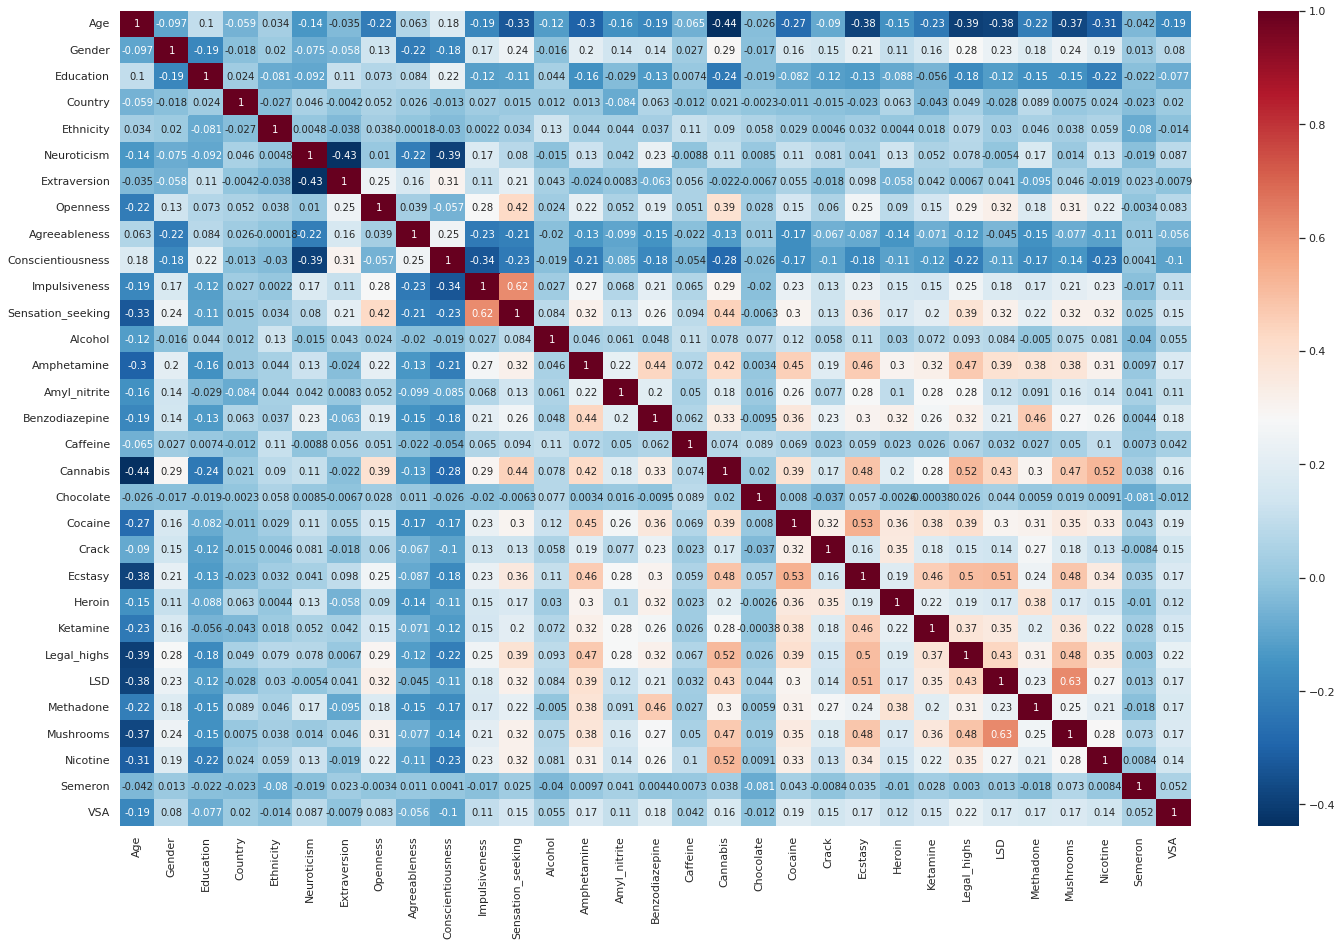

In [ ]:
# Correlation before feature selection
fig, ax = plt.subplots(figsize=(24,15))
sb.heatmap(data.corr(),cmap="RdBu_r", annot=True)

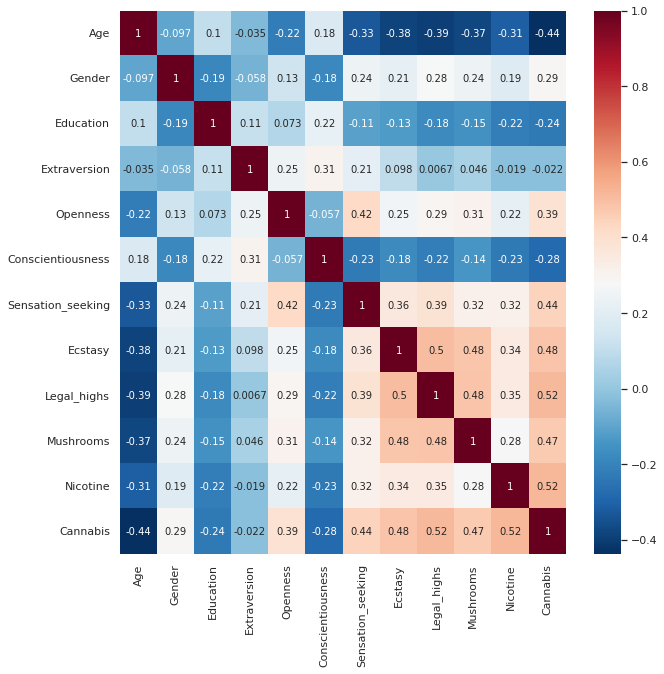

In [ ]:
# Correlation after feature selection

fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(data_2.corr(),cmap="RdBu_r", annot=True)

### Correlation visualization


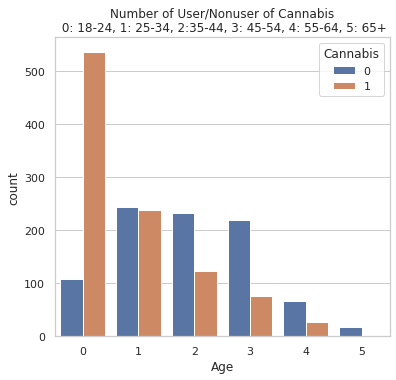

In [ ]:
#'18-24'  -> 0
#'25-34'  -> 1
#'35-44'  -> 2
#'45-54'  -> 3
#'55-64'  -> 4
#'65+'    -> 5
fig, ax = plt.subplots(figsize=(6,5.5))
g = sb.countplot(x='Age', data=data,hue="Cannabis").set_title(
    'Number of User/Nonuser of Cannabis\n 0: 18-24, 1: 25-34, 2:35-44, 3: 45-54, 4: 55-64, 5: 65+')

Text(0.5, 0.98, 'Number of User/Nonuser of Cannabis\n 0-Female, 1-Male')

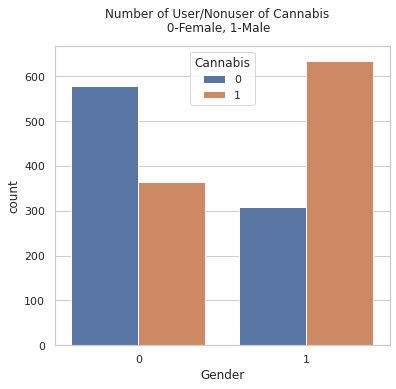

In [ ]:
fig, axes = plt.subplots(figsize=(6,5.5))
plot = sb.countplot(x='Gender', data=data,hue="Cannabis")
fig.suptitle('Number of User/Nonuser of Cannabis\n 0-Female, 1-Male')
#g.set_ylabel('Your Y-axis label')

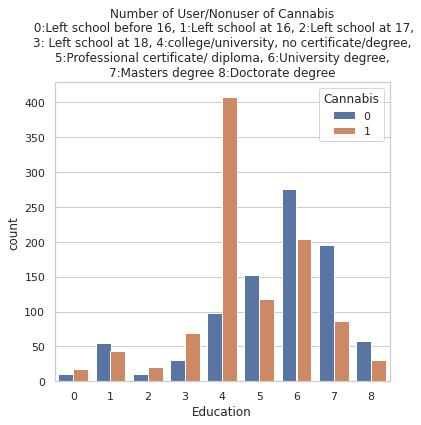

In [ ]:
# Left school before 16 years                          -> 0
# Left school at 16 years                              -> 1
# Left school at 17 years                              -> 2
# Left school at 18 years                              -> 3
# Some college or university, no certificate or degree -> 4
# Professional certificate/ diploma                    -> 5
# University degree                                    -> 6
# Masters degree                                       -> 7
# Doctorate degree

fig, ax = plt.subplots(figsize=(6,5.5))
g = sb.countplot(x='Education', data=data,hue="Cannabis").set_title(
    'Number of User/Nonuser of Cannabis\n 0:Left school before 16, 1:Left school at 16, 2:Left school at 17,\n3: Left school at 18, 4:college/university, no certificate/degree,\n5:Professional certificate/ diploma, 6:University degree,\n7:Masters degree 8:Doctorate degree')

Young people 18-24 years old have a highist risk of consuming cannabis. 

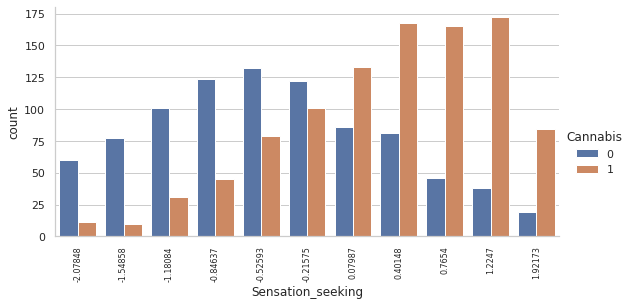

In [ ]:
g = sb.catplot(x="Sensation_seeking",
                hue="Cannabis",  
                 data=data, kind="count", height=4, aspect=2)
g.set_xticklabels(rotation=90,fontsize=8)

A person with a high level of sensation-seeking enjoys trying new things.They are imaginative, curious, and open-minded. So, sensation seeking is strongly positively correlated with drug consumption. 

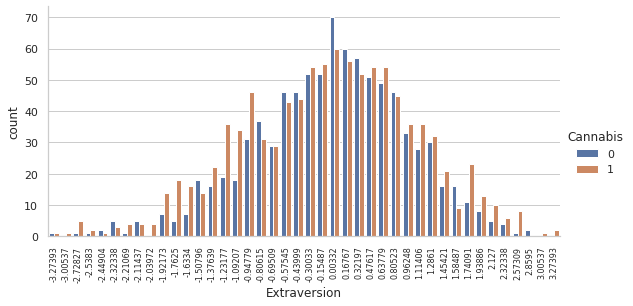

In [ ]:
g = sb.catplot(x="Extraversion",
                hue="Cannabis",  
                 data=data, kind="count", height=4, aspect=2)
g.set_xticklabels(rotation=90,fontsize=8)

A person with a higher or lower level of extraversion is prone to using cannabis.

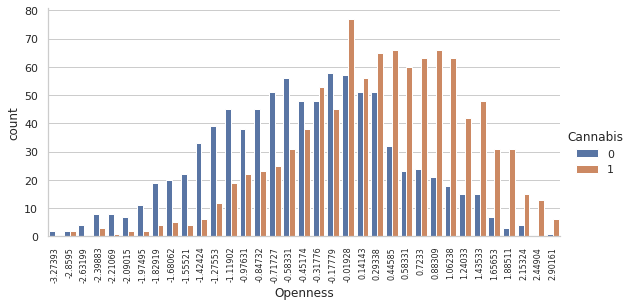

In [ ]:
g = sb.catplot(x="Openness",
                hue="Cannabis",  
                 data=data, kind="count", height=4, aspect=2)
g.set_xticklabels(rotation=90,fontsize=8)

The higher the openness score, the more likely people are to use cannabis.

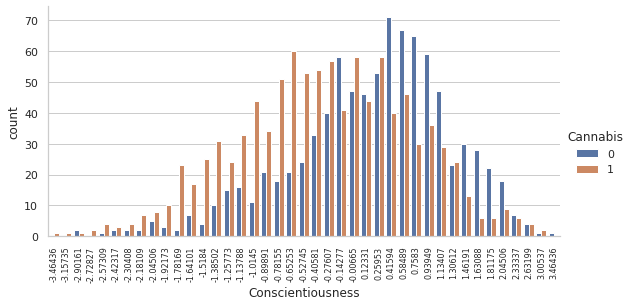

In [ ]:
g = sb.catplot(x="Conscientiousness",
                hue="Cannabis",  
                 data=data, kind="count", height=4, aspect=2)
g.set_xticklabels(rotation=90,fontsize=8)

The lower the conscientiousness rate, the more likely people are to use cannabis.

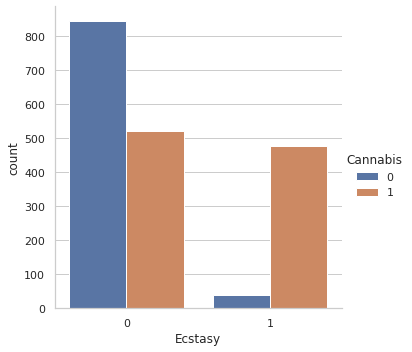

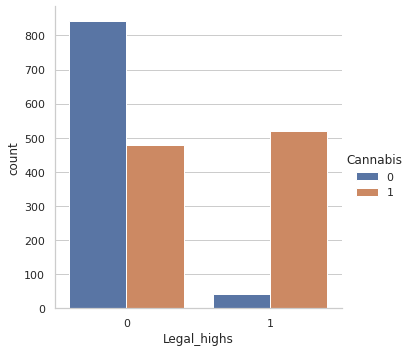

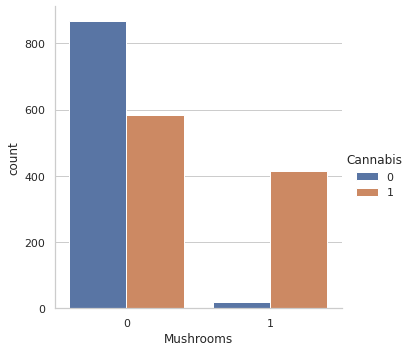

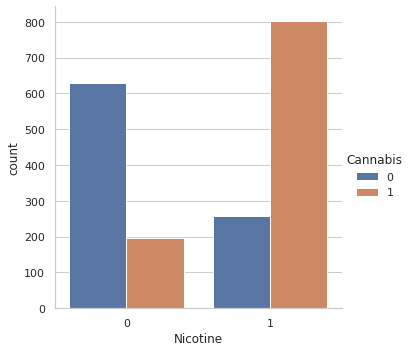

In [ ]:
# Drugs Visualization

g = sb.catplot(x='Ecstasy', hue="Cannabis", data=data, kind="count") 
g = sb.catplot(x='Legal_highs', hue="Cannabis", data=data, kind="count") 
g = sb.catplot(x='Mushrooms', hue="Cannabis", data=data, kind="count") 
g = sb.catplot(x='Nicotine', hue="Cannabis", data=data, kind="count") 


Text(0.5, 1.0, 'people number of Ethnicity')

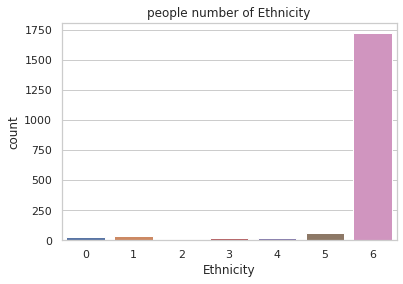

In [ ]:
#plotting numbers of different Ethnicity
# 6 - means white people

f, ax = plt.subplots()
sb.countplot(x="Ethnicity", data=data);
plt.title('people number of Ethnicity')

Text(0.5, 1.0, 'people number of Country')

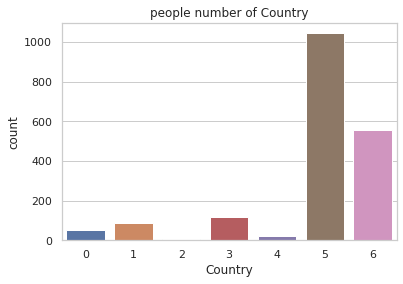

In [ ]:
#plotting numbers of people from different Country
# 5 - means from UK
# 6 - means from the USA
f, ax = plt.subplots()
sb.countplot(x="Country", data=data);
plt.title('people number of Country')

Visualized the number of people by "Ethnicity" and "Country," and we see that white people are dominant and most people are from the UK or the USA, which means these two features are imbalanced and can not provide sufficient information for us to classify. 
